In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import sys
from sympy import *
#sys.path.append("../")
from pyACC.calculus import *
from pyACC.cosmology import *

Compute a 3D grid in configuration space with uniform density

In [2]:
n = 10 #uniform density
dx = 10/n
x = np.linspace(0,10,n)
y= np.linspace(0,10,n)
z = np.linspace(0,10,n)
xv, yv, zv = np.meshgrid(x, y,z, indexing='ij')

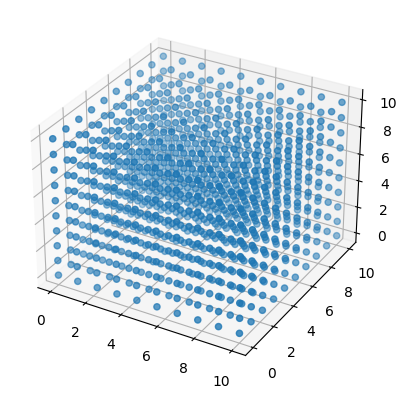

In [3]:
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')
ax.scatter(xv, yv,zv)
plt.show()

In [4]:
dens = np.ones((n,n,n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            dens[i,j,k] = 5

compute the fourier transofrmation of the grid

In [20]:
FT = np.fft.fftn(dens)

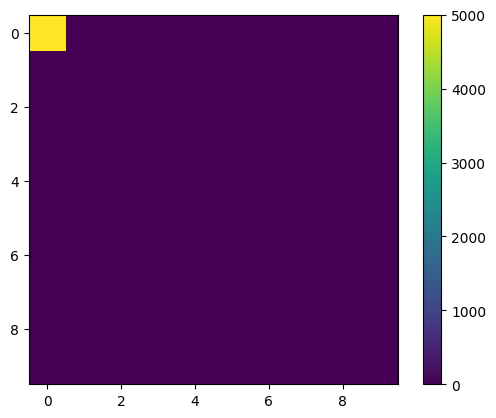

In [21]:
plt.imshow(np.real(FT[:,:,0]))
plt.colorbar()
plt.show()


In [22]:
print(FT)

[[[5.00000000e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j]
  [7.10542736e-14+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
   0.000

I need the sample frequencies of the the grid.
The density is real so $k_{x}=k_{y}=k$ while $k_{z}=2\pi *i/L$ where i=0,N/2

In [26]:
kx = 2*np.pi*np.fft.fftfreq(n,dx)
ky = kx
kz = 2*np.pi*np.fft.rfftfreq(n,dx)
kxv, kyv, kzv = np.meshgrid(kx, ky,kz, indexing='ij')
print(kx.size)
print(kz.size)

10
6


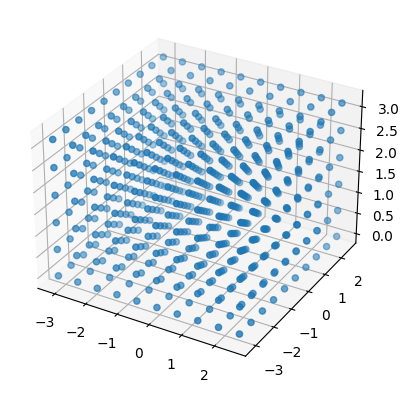

In [9]:
fx = plt.figure().add_subplot(projection='3d')
#ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')
fx.scatter(kxv, kyv,kzv)
plt.show()

Compute the power spwctrum of the signal

In [33]:
#PK = np.asb(FT)**2/volume
PK = np.absolute(FT)**2
print(PK)

[[[2.50000000e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [5.04870979e-27 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [5.04870979e-27 0.00000000e+00 0.00000

In [32]:
m = kx.size
mz = kz.size

PK_true = []
for i in range(m):    #kx
    for j in range(m):    #ky
        for l in range(mz):    #kz
            PK_true = np.append(PK_true,PK(kx[i],ky[j],kz[l]))

print(PK_true.size)
print(PK_true.shape)

TypeError: 'numpy.ndarray' object is not callable

In order to compute the power spectrum of all the points in the grid I have to divide the space in bins and count how many k set in each bin.
Each k corresponds to a value of P(k).
Once I have the bins I have to sum up all the P(k) in each bin


In [29]:
#modulus of k all over the grid
k = np.sqrt(kx[:, None, None]**2 + ky[None,:,None]**2 + kz[None,None,:]**2)   
#print(k)
print(k.shape)
#PK_true = PK(k)
print(k.size)

(10, 10, 6)
600


In [11]:
#I crate the bins
k_bin = np.linspace(2*np.pi/10,2*np.pi/dx,10)   #(fundamental freq, Nyquist freq)
print(k_bin.size)

10


In [13]:
k_flat = np.ndarray.flatten(k)
#print(k_flat)
print(k.shape)
PK_flat = np.ndarray.flatten(PK_true)


(10, 10, 6)


In [18]:
n_b = k_bin.size
sum = np.zeros(n_b)
l = np.zeros(n_b)
#having an array and a binning, digitize returns the bins'index of each entrie of the array 
for i in range (0,n_b):  
    for j in range (0,k_flat.size):
        index = np.digitize(k_flat[j],k_bin)-1   #digitize starts from 1 and not from 0 like all other functions
        if index == i:
            sum[i] += PK_flat[j] #sum all k in that bin
            l[i] += 1
    
 #quasi ma devo sommare il power spectrum e non i k
# con flatten evito millemila cicli

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
m = kx.size
mz = kz.size
#k = [] 

print(m)
print(mz)

In [ ]:
#funzione flatten per appiattire le cose 3D
#foto alfonso

In [34]:
#modulus of k
for i in range(m):    #kx
    for j in range(m):    #ky
        for l in range(mz):    #kz
            k = np.append(k,np.sqrt(kx[i]**2+ky[j]**2+kz[l]**2))

print(k)
print(k.size)
print(m*m*mz)

[0.         0.62831853 1.25663706 ... 2.08389682 2.66572976 3.26483886]
2400
600


In [21]:
temp = []
n_k = k.size
j = np.digitize(k,k_bin)   #Return the indices of the bins to which each value in input array belongs.

print(j)
print(n_k)
print(j.size)

[0 1 2 ... 3 4 5]
1800
1800


In [ ]:
for i in range (0,k.size):
    temp = np.digitize(k[i],k_bin)

In [26]:
temp = np.ndarray(shape = (n_k,n_k))
temp = (j,k)
print(temp)

(array([0, 1, 2, ..., 3, 4, 5]), array([0.        , 0.62831853, 1.25663706, ..., 2.08389682, 2.66572976,
       3.26483886]))


In [ ]:
for i in range(m):    #kx
    for j in range(m):    #ky
        for l in range(mz):    #kz
            k = np.append(k,np.sqrt(kx[i]**2+ky[j]**2+kz[l]**2))


In [ ]:
'''
pk = []
for i in range (0,n_b):   #
   for t in range(m):    #kx
    for j in range(m):    #ky
        for l in range(mz):    #kz
            k = np.append(k,np.sqrt(kx[t]**2+ky[j]**2+kz[l]**2)) 
            pk = np.append(pk,FT(kx[t],ky[j],kz[l])
'''

In [11]:
print(PK)

[[[2.5e+13+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  ...
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]]

 [[0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  ...
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0e+00+0.j]
  [0.0e+00+0.j 0.0e+00+0.j 0.0e+00+0.j ... 0.0e+00+0.j 0.0e+00+0.j
   0.0